# Proyecto de Aprendizaje Supervisado
- Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de regresión.
- Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

In [2]:
#! pip install jupyterthemes

     ---------------------------------------- 7.0/7.0 MB 40.8 MB/s eta 0:00:00
     ---------------------------------------- 46.7/46.7 kB ? eta 0:00:00


### Librerías a básicas utilizar

In [2]:
# Importar librerías


# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

import warnings
warnings.filterwarnings("ignore")

### Lectura de los datos

In [3]:
# Lectura del csv a un dataframe de pandas
# Tarea de regresión en donde nuestra variable objetivo es la esperanza de vida (tipo continua)
# Se pueden observar las variables independientes que se podrían utilizar para predecir la variable dependiente

df = pd.read_csv('Datos/Life_Expectancy_Data.csv')
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Exploración y visualización de los datos

In [4]:
# Revisar la información del dataframe
# Se observa el tipo de cada variable (dependiente e independientes)
# Se obtiene la información acerca de datos no nulos para cada variable
# Nos permite conocer la cantidad de datos faltantes por columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [5]:
# Resumen estadístico del dataframe
# Podemos ratificar la cantidad de datos por columna (y datos faltantes)
# Revisamos los principales estadísticos descriptivos por variable

df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


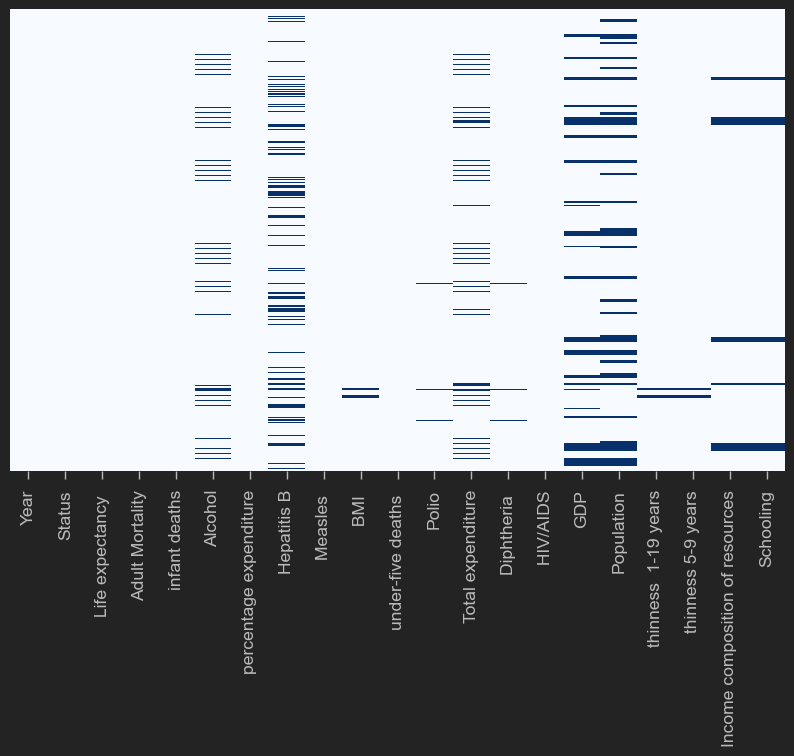

In [6]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

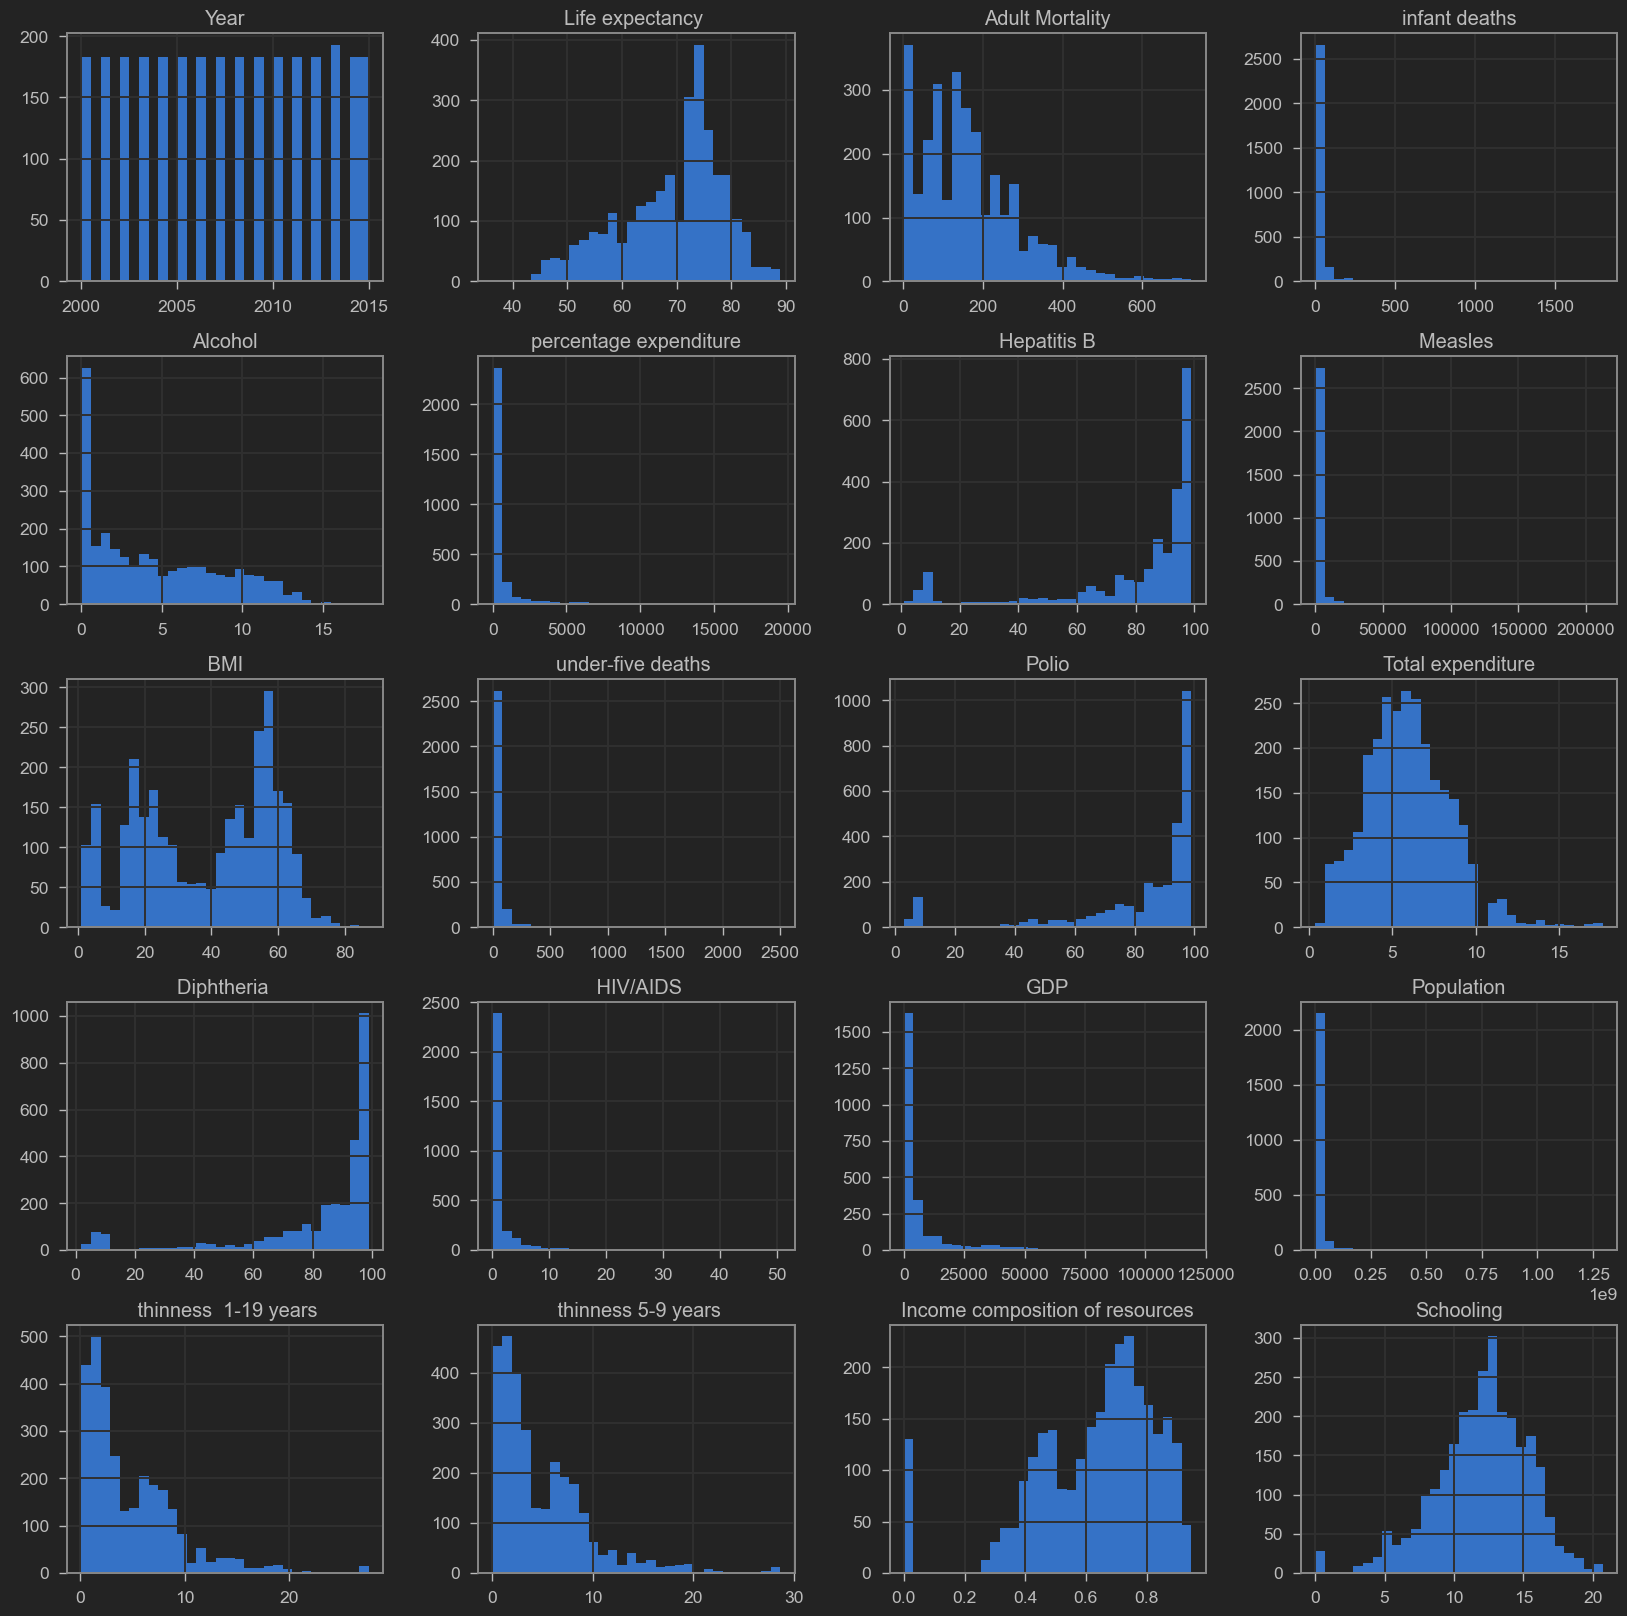

In [7]:
# Realizamos un histograma
# De esta manera observamos la distribución de cada una de las variables dentro del dataframe

df.hist(bins = 30, figsize = (20, 20), color = 'b');

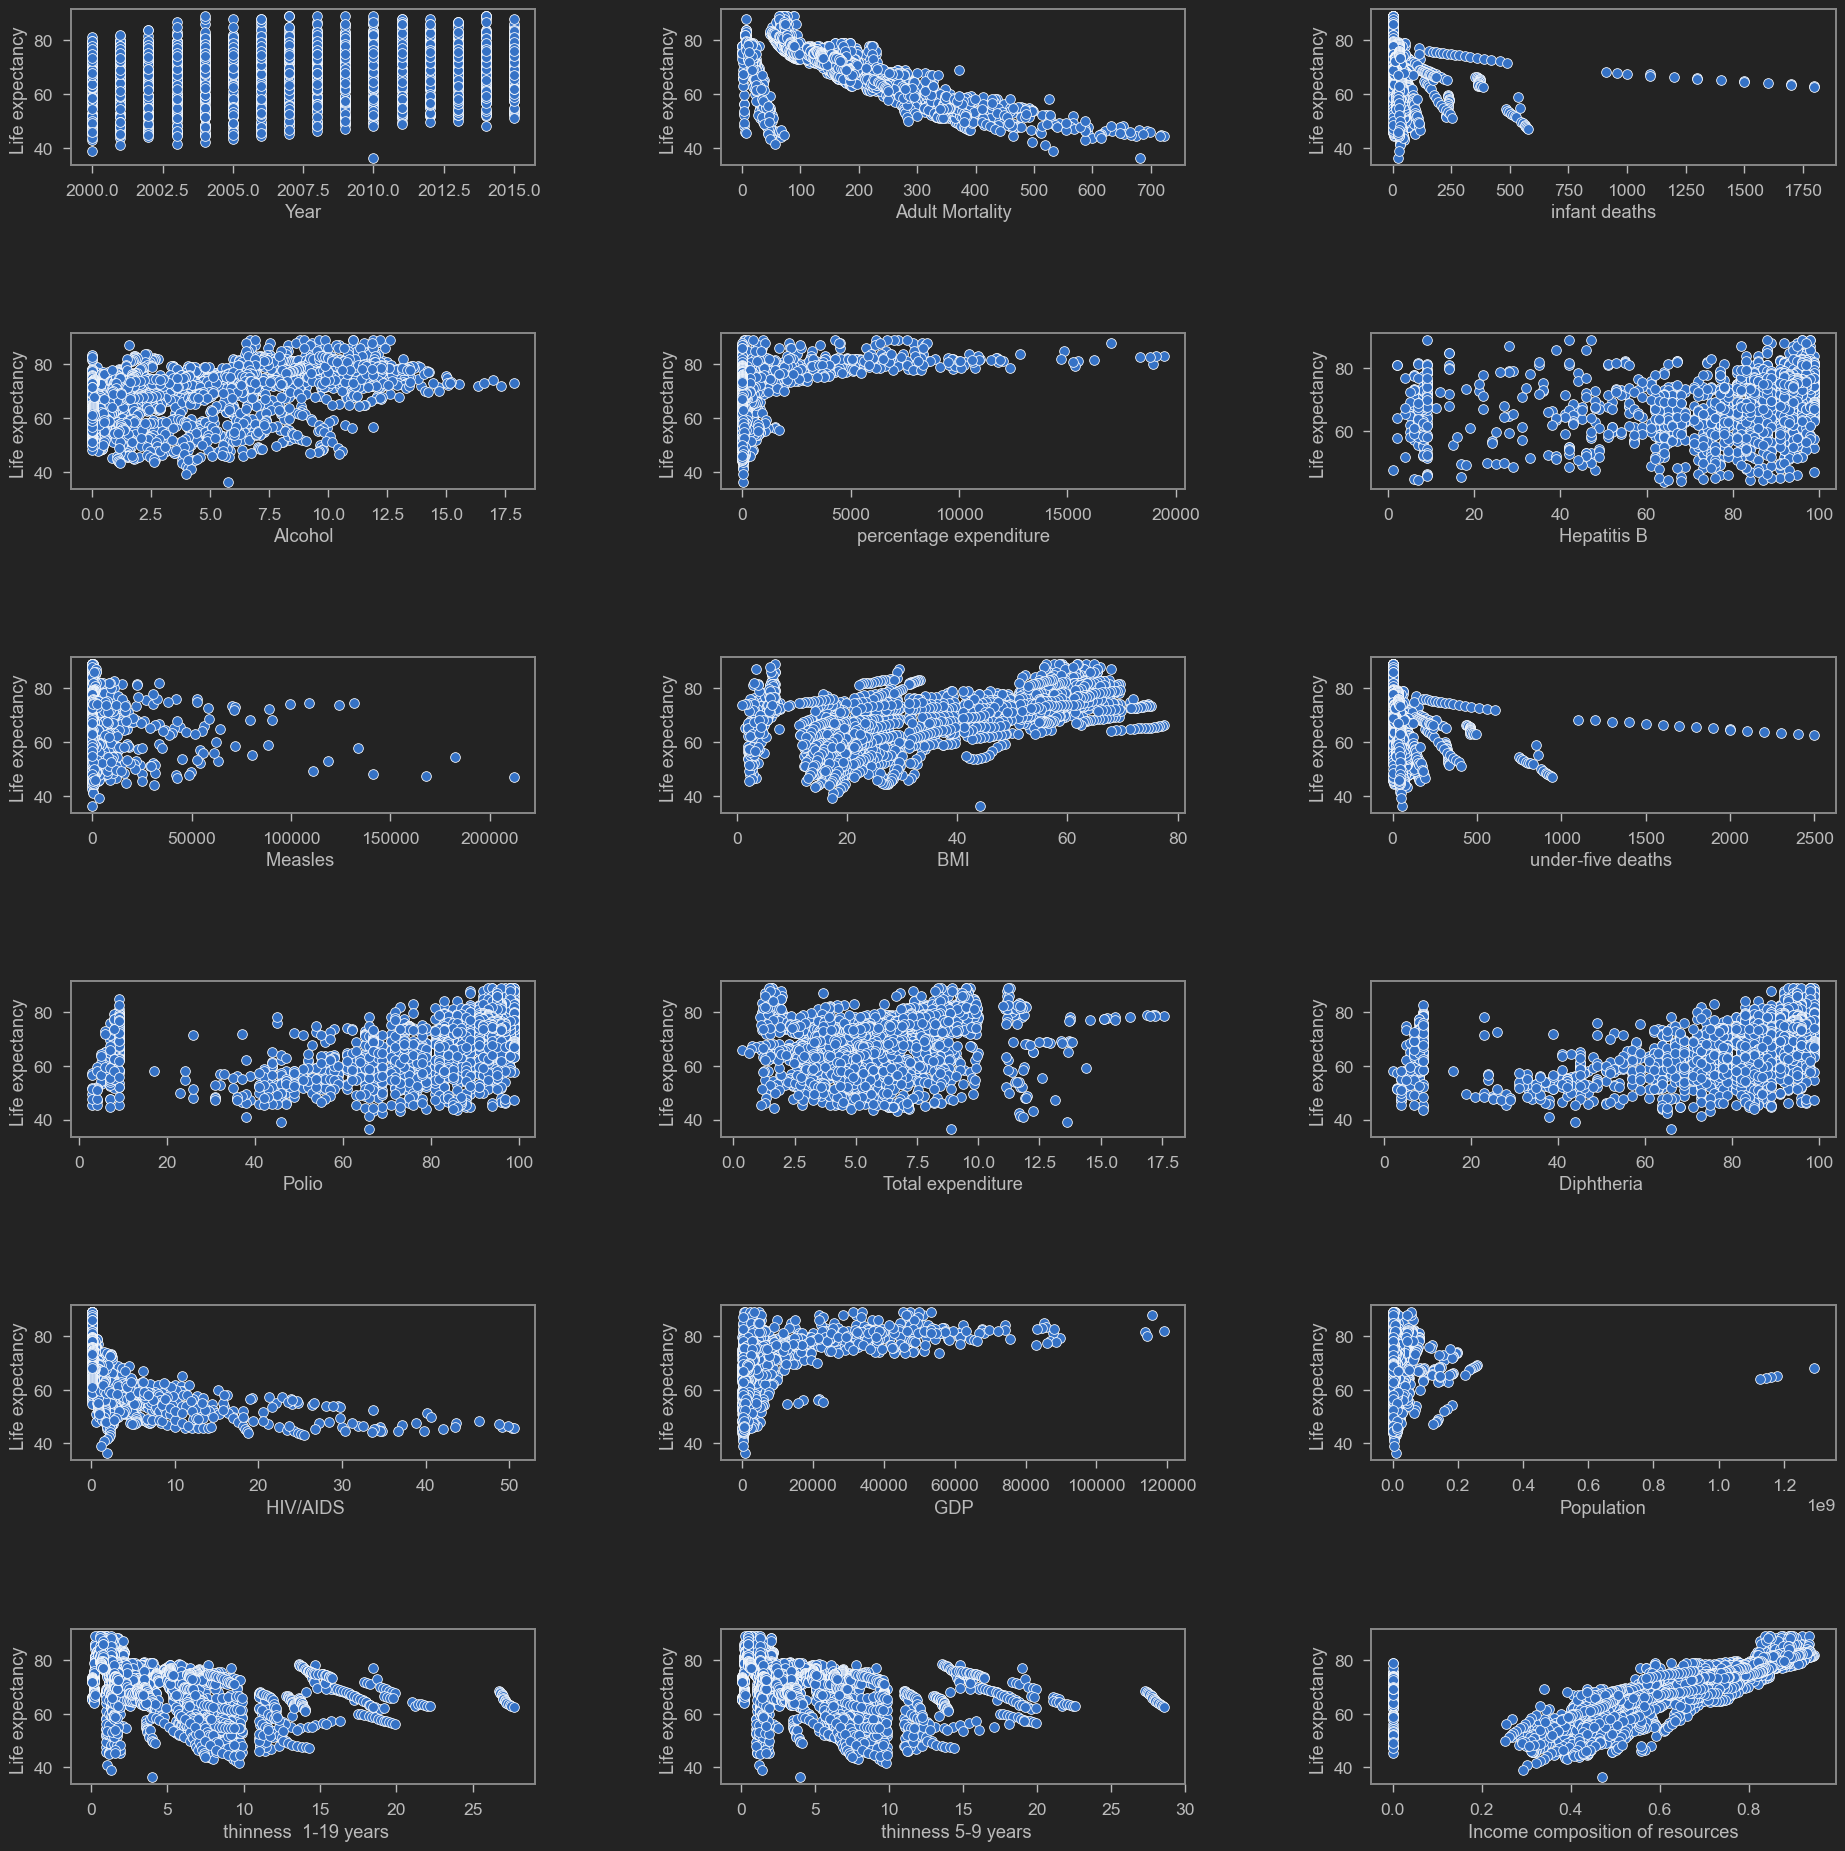

In [8]:
# Pairplot
# Para revisar la relación entre variables independientes y dependiente
# En general las relaciones no parecen lineales

def independent_vs_dependent_pairplots():
    features = df.select_dtypes(include=np.number).columns
    features = features.delete(1)
    fig, axs = plt.subplots(6,3)
    fig.tight_layout()
    fig.set_size_inches(20,20)
    k=0
    for i in range(6):
        for j in range(3):
            sns.scatterplot(data=df,x=features[k],y = 'Life expectancy ',ax=axs[i,j])
            k += 1
    

independent_vs_dependent_pairplots()


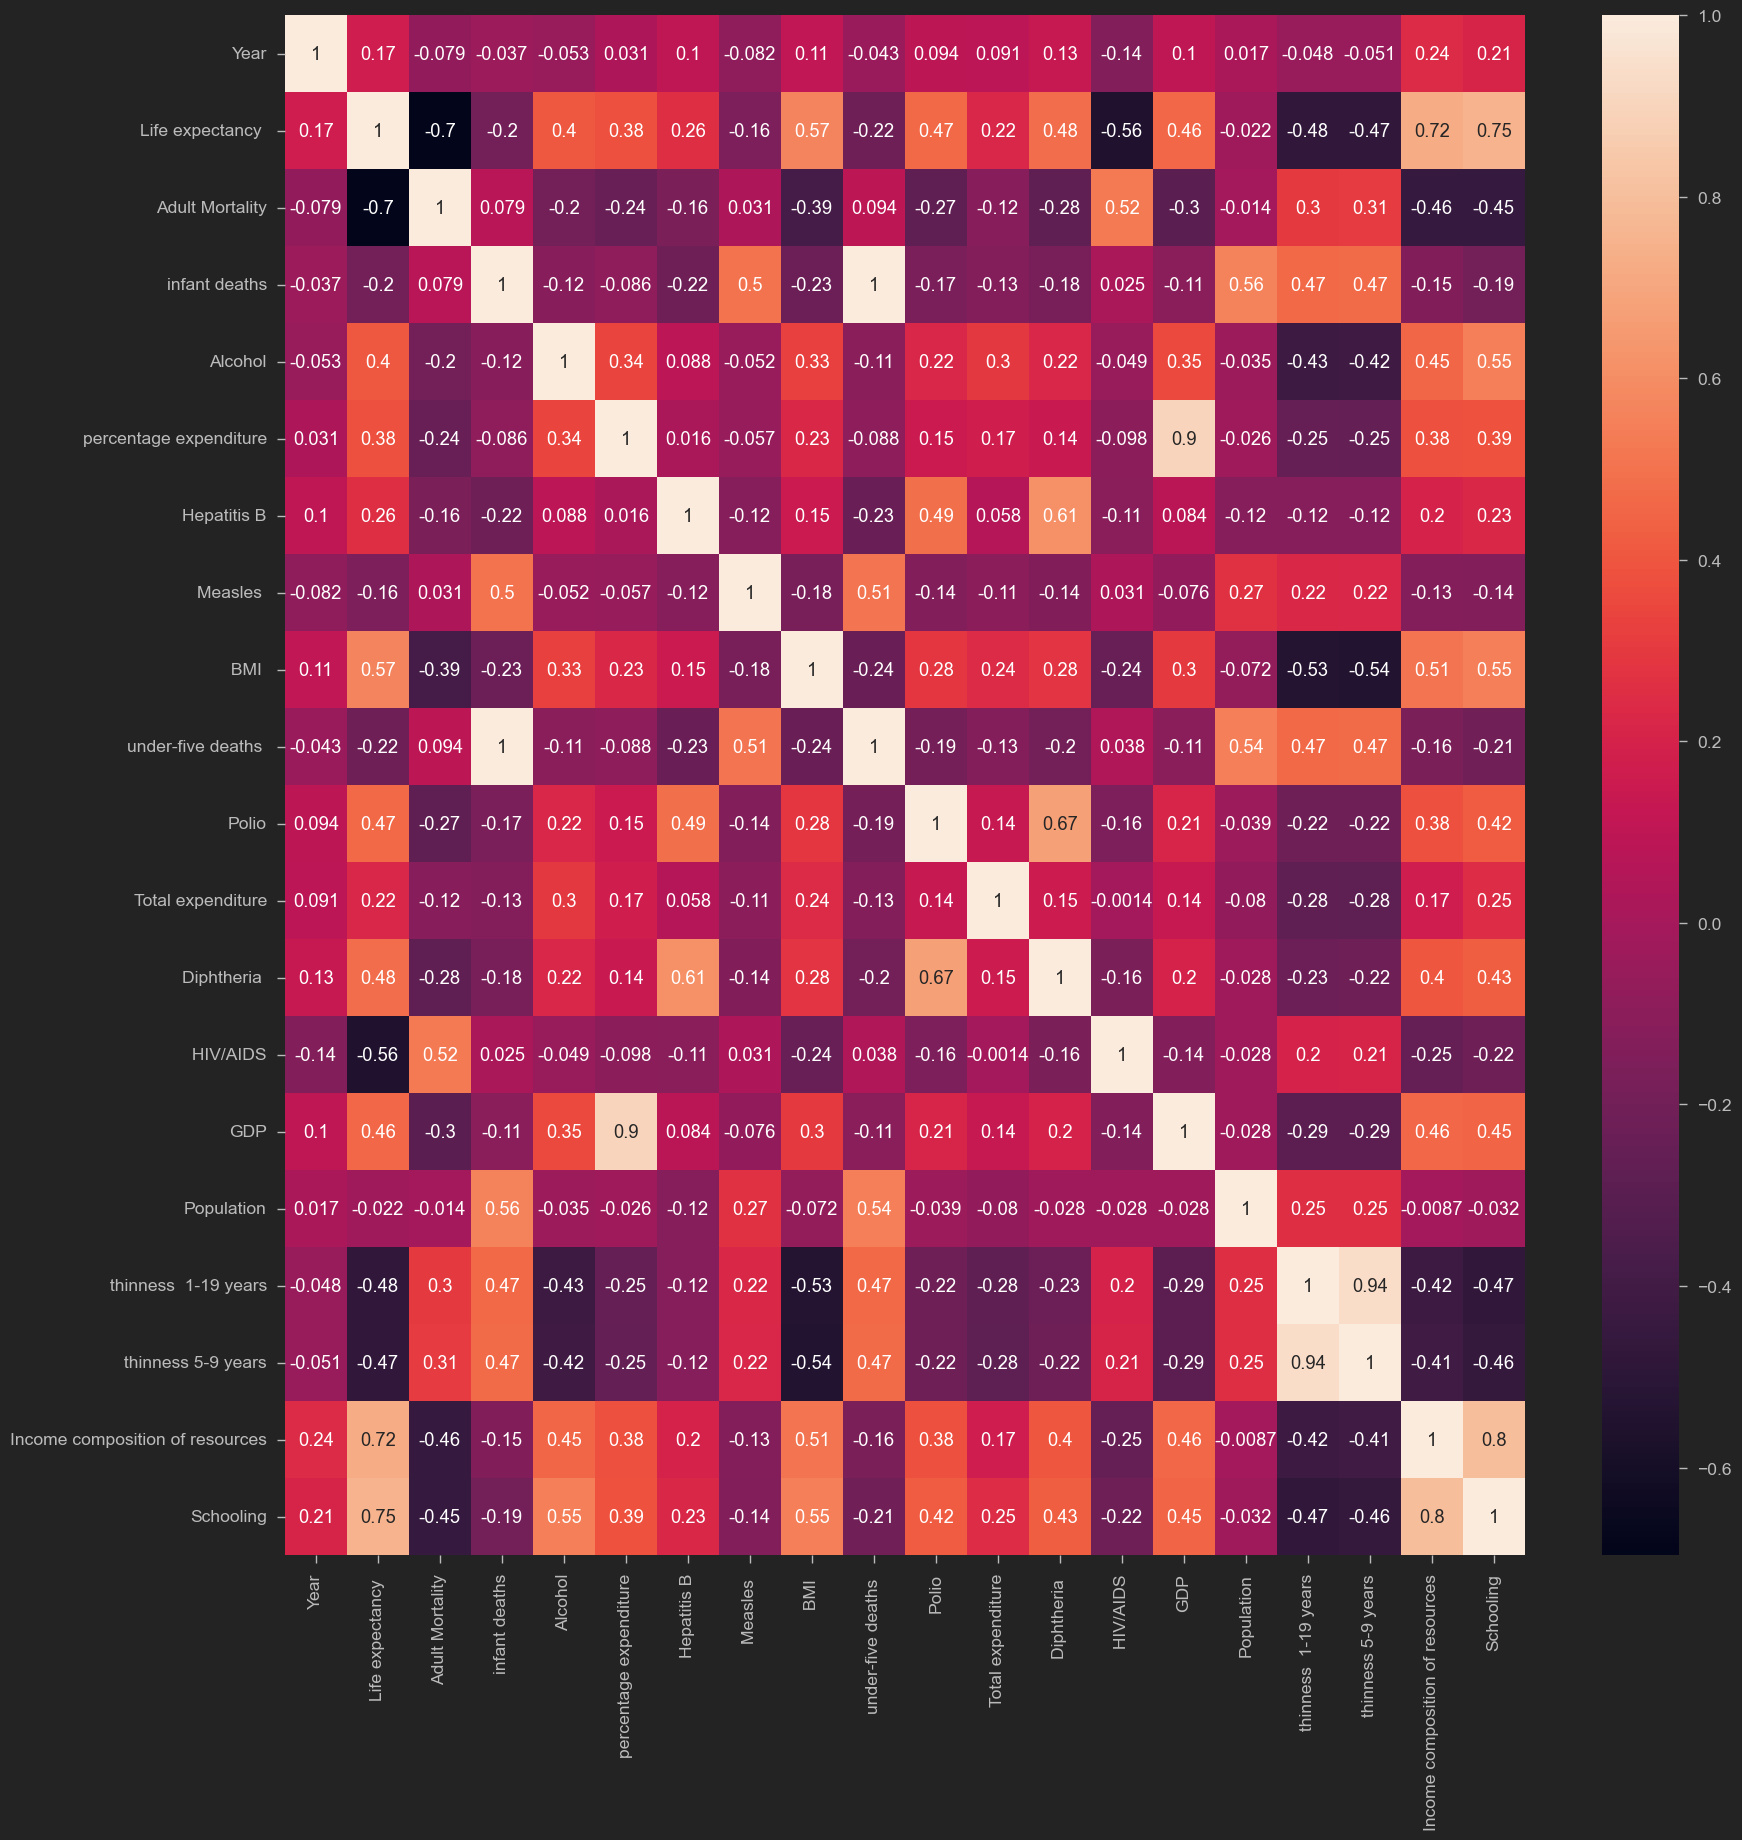

In [9]:
# Matriz de correlación
# Importante para conocer la correlación entre cada par de variables
# Las variables independientes a utilizar deberían estar altamente correlacionadas con la objetivo
# Se deben evitar problemas de multicolinealidad
# Las variables independientes no deben estar correlacionadas entre sí
# Si las variables independientes se encuentran altamente correlacionadas, el modelo puede presentar problemas
# al momento de entrenarlo e interpretarlo
# No se podría aislar la relación entre cada variable independiente y la dependiente
# Si no se pueden aislar los efectos, se pueden confundir dichos efectos
# Cuando las variables independientes están muy correlacionadas los cambios en una variable están asociados 
# con cambios en otra variable y, por tanto, los coeficientes de regresión del modelo ya no van a medir el 
# efecto de una variable independiente sobre la respuesta manteniendo constante, o sin variar, el resto 
# de predictores. 

plt.figure(figsize = (20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Ingeniería de características

In [10]:
# Extracción y transformación de variables
# Para utilizar la variable Status que es categórica, podemos dummificarla
# Utilizamos one-hot encoding

df = pd.get_dummies(df,columns=['Status'])
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


### Limpieza de datos

In [11]:
# Verificar cuáles son las columnas que tienen valores faltantes

df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [12]:
# Número de valores faltantes en aquellas columnas que tienen datos faltantes

df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
# Primera aproximación: utilizar la media para imputar los datos faltantes (variables numéricas)
# Para cada columna, si existe un valor faltante se completa con la media

df_mean = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [14]:
# Verificamos que ya no existen datos faltantes

df_mean.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
 BMI                               0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

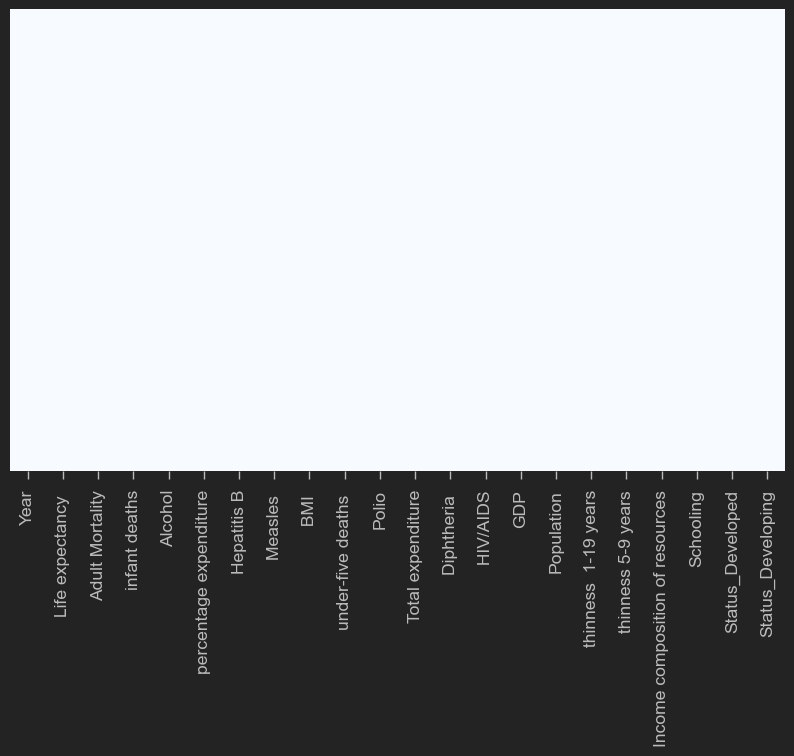

In [15]:
# Revisamos nuevamente los datos faltantes con el mapa de calor
# Nos damos cuenta que efectivamente no existen datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_mean.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [16]:
# Construimos una función que nos permite obetener el X y el y para el dataframe de Life expectancy

def obtain_X_y(df):
    return df.drop(columns=['Life expectancy ']),df[['Life expectancy ']]



In [17]:
# Obtenemos las varaibles independientes y la dependiente a partir del dataframe imputado con la media

X_mean,y_mean = obtain_X_y(df_mean)

In [18]:
# Segunda aproximación: utilizar knn para imputar los datos faltantes
# Utilizamos KNNImputer para completar los datos faltantes
# Para optimizar debemos encontrar el mejor k

from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 

def optimize_k(df):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(df)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X,y = obtain_X_y(df_imputed)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

        model = RandomForestRegressor(random_state=1234)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = np.sqrt(mean_squared_error(y_test, preds))
        errors.append({'K': k, 'RMSE': error, 'R^2': r2_score(y_test,preds)})
        
    return errors

errors = optimize_k(df)
print(errors)

[{'K': 1, 'RMSE': 2.0027014289717373, 'R^2': 0.9513153858973602}, {'K': 3, 'RMSE': 1.9803959462517742, 'R^2': 0.9523608081778234}, {'K': 5, 'RMSE': 1.9246050058809805, 'R^2': 0.9549842585994495}, {'K': 7, 'RMSE': 1.9528665806767744, 'R^2': 0.9536463342879505}, {'K': 9, 'RMSE': 1.9175499383270287, 'R^2': 0.9553005101428738}, {'K': 11, 'RMSE': 1.8908856823620834, 'R^2': 0.9565234574519932}, {'K': 13, 'RMSE': 1.9032519964657892, 'R^2': 0.955951459612966}, {'K': 15, 'RMSE': 1.8770238402725123, 'R^2': 0.957153698841308}, {'K': 17, 'RMSE': 1.8821735225158436, 'R^2': 0.9569222530279773}, {'K': 19, 'RMSE': 1.8913121684463075, 'R^2': 0.9565067869301538}]


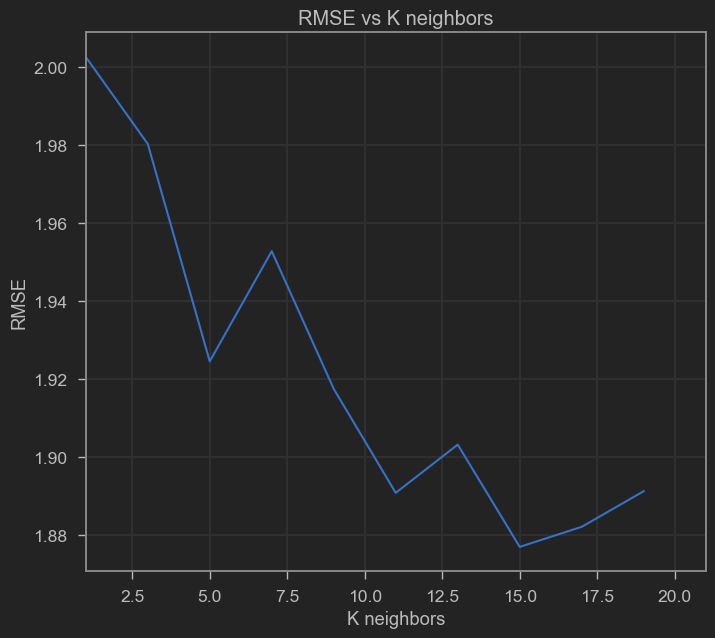

In [19]:
# Gráfica para encontrar el mejor k teniendo en cuenta el RMSE
 
ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['RMSE'] for i in range(len(errors))])
ax.set(title='RMSE vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='RMSE')
plt.grid()
plt.show()

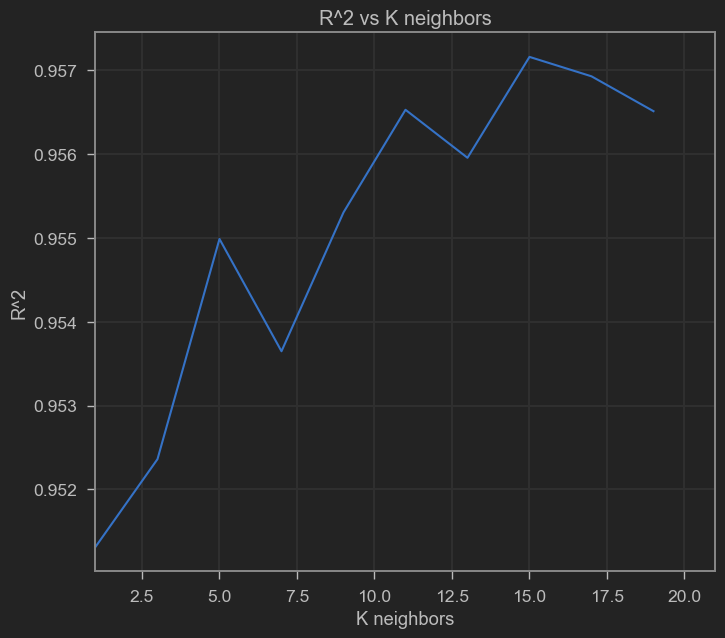

In [20]:
# Gráfica para encontrar el mejor k teniendo en cuenta el R^2

ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['R^2'] for i in range(len(errors))])
ax.set(title='R^2 vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='R^2')
plt.grid()
plt.show()

In [22]:
# Luego de reconocer a k=15 como el mejor número de vecinos más cercanos, 
# podemos imputar nuestros datos faltantes

imputer = KNNImputer(n_neighbors=15)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
X_knn,y_knn = obtain_X_y(df_imputed)

### Protocolos de evaluación

In [23]:
# Con nuestra primera aproximación (imputación con la media)
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mean,y_mean,random_state=1234,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 21)
(882, 21)
(2056, 1)
(882, 1)


In [24]:
# Con nuestra segunda aproximación (imputación con knn con k=19)
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_knn,y_knn,random_state=1234,test_size=0.3)


### Métricas de evaluación

In [25]:
# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto 
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo, 
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de 
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test


### Baseline

In [26]:
# Establecemos el baseline a partir de un dummy regressor

from sklearn.dummy import DummyRegressor

regression_metrics(DummyRegressor(strategy='mean'),X_train,X_test,y_train,y_test)
print()
regression_metrics(DummyRegressor(strategy='mean'),X_train2,X_test2,y_train2,y_test2)



Training R^2 = 0.0
Test R^2 = -4.767054546661598e-06
Training Adj R^2 = -0.010324483775811188
Test Adj R^2 = -0.024423488110529634
Training MAE = 7.908927482173307
Test MAE = 7.426507390660117
Training MAPE = 0.12376884820993096
Test MAPE = 0.11540306895825324
Training RMSE = 9.689399486516061
Test RMSE = 9.064170885948323

Training R^2 = 0.0
Test R^2 = -3.718400717778181e-06
Training Adj R^2 = -0.010324483775811188
Test Adj R^2 = -0.024422413850037517
Training MAE = 7.9203623288518115
Test MAE = 7.438017336203828
Training MAPE = 0.12394141834319056
Test MAPE = 0.11557437951003693
Training RMSE = 9.693010141306397
Test RMSE = 9.068050459147921


(DummyRegressor(),
 {'Training R^2': 0.0,
  'Test R^2': -3.718400717778181e-06,
  'Training Adj R^2': -0.010324483775811188,
  'Test Adj R^2': -0.024422413850037517,
  'Training MAE': 7.9203623288518115,
  'Test MAE': 7.438017336203828,
  'Training MAPE': 0.12394141834319056,
  'Test MAPE': 0.11557437951003693,
  'Training RMSE': 9.693010141306397,
  'Test RMSE': 9.068050459147921})

### Modelo de regresión lineal

Modelo de regresión lineal con todas las variables e imputación con la media

In [27]:
# Aunque no todas las variables independientes pareciesen tener una relación lineal con la objetivo
# Utilizamos el modelo de regresión lineal
# Calculamos las métricas de regresión para este modelo con conjuntos imputados con la media
# Guardamos el modelo y sus metricas

import pickle
from sklearn.linear_model import LinearRegression

model,metrics = regression_metrics(LinearRegression(),X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/linearRegressionImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/linearRegressionImpMeanMetrics.pkl', 'wb'))

Training R^2 = 0.8234235882453508
Test R^2 = 0.8073346987435159
Training Adj R^2 = 0.8216005279469989
Test Adj R^2 = 0.8026300809221367
Training MAE = 3.020403006349646
Test MAE = 3.00941172372891
Training MAPE = 0.04644147401860549
Test MAPE = 0.04534861645348225
Training RMSE = 4.071582185311754
Test RMSE = 3.9785864795947186


FileNotFoundError: [Errno 2] No such file or directory: 'models/linearRegressionImpMean.pkl'

Modelo de regresión lineal con todas las variables e imputación con knn

In [28]:
# Calculamos las métricas de regresión para un modelo de regresión lineal con conjuntos imputados 
# con knn k=15
# Los resultados parecen mejorar con este tipo de imputación
# Guardamos el modelo

model,metrics = regression_metrics(LinearRegression(),X_train2,X_test2,y_train2,y_test2)
pickle.dump(model, open('models/linearRegressionImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/linearRegressionImpKnnMetrics.pkl', 'wb'))

Training R^2 = 0.8358281086558472
Test R^2 = 0.8146377242619048
Training Adj R^2 = 0.8341331186272203
Test Adj R^2 = 0.8101114361334165
Training MAE = 2.915972888445583
Test MAE = 2.9340238742963796
Training MAPE = 0.04471743711645247
Test MAPE = 0.04422962445863485
Training RMSE = 3.9274265154495356
Test RMSE = 3.9041257445640563


FileNotFoundError: [Errno 2] No such file or directory: 'models/linearRegressionImpKnn.pkl'

### Selección de características

In [29]:
# Utilizamos un método para extracción recursiva de características utilizando validación cruzada
# Con este método obtenemos las variables independientes más importantes dentro del dataframe 

from sklearn.feature_selection import RFECV

select = RFECV(LinearRegression(), step=1, cv=5)
select = select.fit(X_train, y_train)
 
print("Ranking de características", select.ranking_)

Ranking de características [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


Ranking de características utilizando RFECV

In [30]:
# Data set con datos imputados con knn=15

select = RFECV(LinearRegression(), step=1, cv=5)
select = select.fit(X_train2, y_train2)
 
print("Ranking de características", select.ranking_)

Ranking de características [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


In [31]:
# Utilizando el objeto de selección de características entrenado con el X_train
# transformamos el X_train y X_test en conjuntos con nueva cantidad de variables independientes

X_train_tf = select.transform(X_train)
X_test_tf = select.transform(X_test)

print('Número de variables elegidas =',X_train_tf.shape[1])
print('Número de variables elegidas =',X_test_tf.shape[1])

regression_metrics(LinearRegression(),X_train_tf,X_test_tf,y_train,y_test)

Número de variables elegidas = 20
Número de variables elegidas = 20
Training R^2 = 0.8234229757976335
Test R^2 = 0.8073446910104631
Training Adj R^2 = 0.8216875750683719
Test Adj R^2 = 0.8028695386529826
Training MAE = 3.0205562031944932
Test MAE = 3.0095077062191105
Training MAPE = 0.04644349035651489
Test MAPE = 0.045350141719805837
Training RMSE = 4.071589246359795
Test RMSE = 3.9784833068558054


(LinearRegression(),
 {'Training R^2': 0.8234229757976335,
  'Test R^2': 0.8073446910104631,
  'Training Adj R^2': 0.8216875750683719,
  'Test Adj R^2': 0.8028695386529826,
  'Training MAE': 3.0205562031944932,
  'Test MAE': 3.0095077062191105,
  'Training MAPE': 0.04644349035651489,
  'Test MAPE': 0.045350141719805837,
  'Training RMSE': 4.071589246359795,
  'Test RMSE': 3.9784833068558054})

In [32]:
# Utilizando el objeto de selección de características entrenado con el X_train2
# transformamos el X_train2 y X_test2 en conjuntos con nueva cantidad de variables independientes

X_train2_tf = select.transform(X_train2)
X_test2_tf = select.transform(X_test2)

print('Número de variables elegidas =',X_train2_tf.shape[1])
print('Número de variables elegidas =',X_test2_tf.shape[1])

regression_metrics(LinearRegression(),X_train2_tf,X_test2_tf,y_train2,y_test2)

Número de variables elegidas = 20
Número de variables elegidas = 20
Training R^2 = 0.83576079755507
Test R^2 = 0.8146600780168943
Training Adj R^2 = 0.8341466530592968
Test Adj R^2 = 0.8103548533482973
Training MAE = 2.9180709641461053
Test MAE = 2.9351267046634546
Training MAPE = 0.04474849842879893
Test MAPE = 0.044247308713827364
Training RMSE = 3.928231562855262
Test RMSE = 3.9038903285353896


(LinearRegression(),
 {'Training R^2': 0.83576079755507,
  'Test R^2': 0.8146600780168943,
  'Training Adj R^2': 0.8341466530592968,
  'Test Adj R^2': 0.8103548533482973,
  'Training MAE': 2.9180709641461053,
  'Test MAE': 2.9351267046634546,
  'Training MAPE': 0.04474849842879893,
  'Test MAPE': 0.044247308713827364,
  'Training RMSE': 3.928231562855262,
  'Test RMSE': 3.9038903285353896})

Selección de características con SelectKBest

In [33]:
# Selección de características
# Podemos utilizar un método diferente para la selección de características
# En este caso hacemos uso de SelectKBest que nos permite seleccionar las k mejores variables
# independientes teniendo en cuenta el f_regression 
# (pruebas univariadas de regresión lineal F-statistics, P-value)
# Construimos una función que a partir del conjunto de entrenamiento y el de prueba nos retorna
# los conjuntos ya transformados

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
def select_features(X_train, y_train, X_test,n):
  fs = SelectKBest(score_func=f_regression, k=n)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

Importancia de las características con SelectKBest y datos imputados con la media

Feature 0: 64.868392
Feature 1: 2035.216662
Feature 2: 86.032091
Feature 3: 370.350327
Feature 4: 340.404953
Feature 5: 102.268012
Feature 6: 58.288909
Feature 7: 1004.353009
Feature 8: 110.646788
Feature 9: 551.332742
Feature 10: 111.919225
Feature 11: 663.309279
Feature 12: 982.056920
Feature 13: 459.026418
Feature 14: 1.103391
Feature 15: 624.841220
Feature 16: 597.156505
Feature 17: 1973.802225
Feature 18: 2214.617977
Feature 19: 650.517901
Feature 20: 650.517901


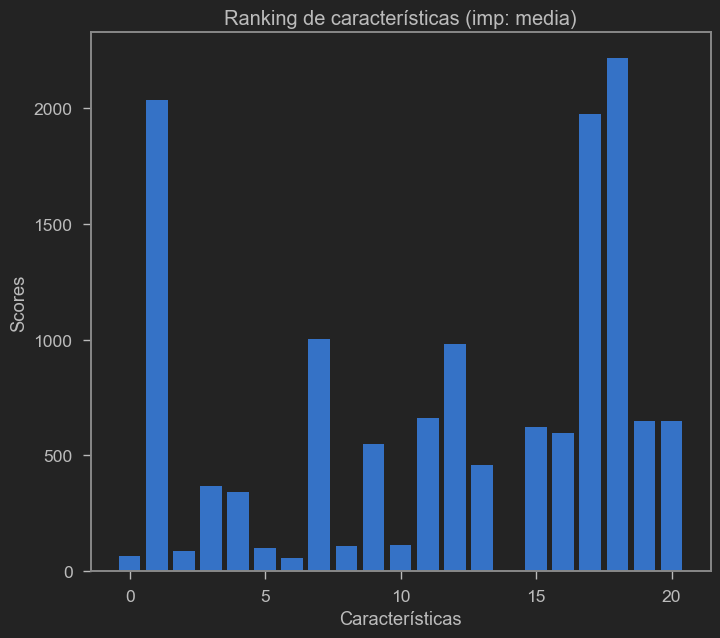

In [34]:
# Haciendo uso de los conjuntos ya transformados podemos ver el score de cada variable
# En este caso utilizamos X_train, X_test, y_train
# Claramente la feature 14 no influye sobre la variable dependiente

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,21)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set(title='Ranking de características (imp: media)',xlabel='Características',ylabel='Scores')
plt.show()

Importancia de las características con SelectKBest y datos imputados con knn

Feature 0: 65.873906
Feature 1: 2036.275465
Feature 2: 86.234813
Feature 3: 422.365090
Feature 4: 339.368379
Feature 5: 196.729871
Feature 6: 58.423404
Feature 7: 1029.924329
Feature 8: 110.876076
Feature 9: 559.210260
Feature 10: 135.199282
Feature 11: 673.628076
Feature 12: 982.963498
Feature 13: 490.074094
Feature 14: 4.438805
Feature 15: 642.063165
Feature 16: 612.465754
Feature 17: 2339.097805
Feature 18: 2697.848076
Feature 19: 647.978584
Feature 20: 647.978584


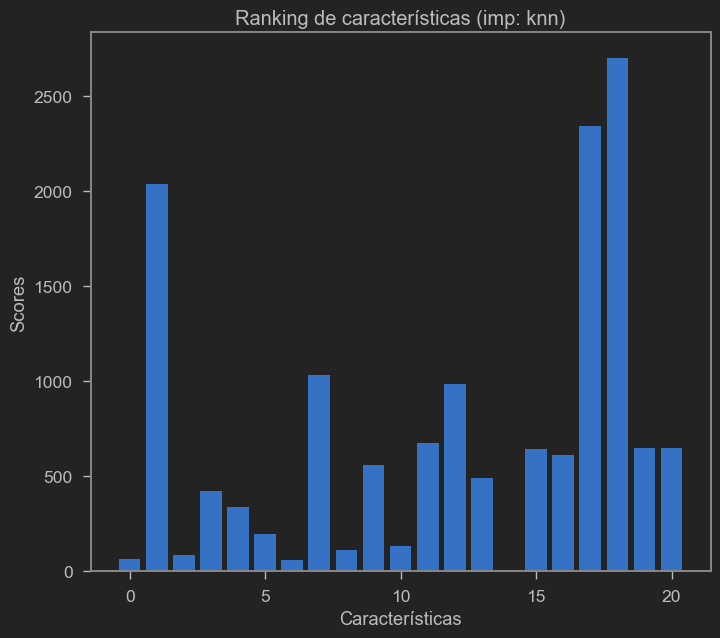

In [35]:
# Haciendo uso de los conjuntos ya transformados podemos ver el score de cada variable
# En este caso utilizamos X_train2, X_test2, y_train2
# Claramente la feature 14 no influye sobre la variable dependiente

X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,21)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set(title='Ranking de características (imp: knn)',xlabel='Características',ylabel='Scores')
plt.show()

Modelo de regresión lineal utilizando feature selection y datos imputados con la media

In [36]:
# Modelo de regresión lineal utilizando feature selection y datos imputados con la media

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,20)
model,metrics = regression_metrics(LinearRegression(),X_train_fs,X_test_fs,y_train,y_test)
pickle.dump(model, open('models/linearRegressionFSImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/linearRegressionFSImpMeanMetrics.pkl', 'wb'))

Training R^2 = 0.8234229757976335
Test R^2 = 0.8073446910104631
Training Adj R^2 = 0.8216875750683719
Test Adj R^2 = 0.8028695386529826
Training MAE = 3.0205562031944932
Test MAE = 3.0095077062191105
Training MAPE = 0.04644349035651489
Test MAPE = 0.045350141719805837
Training RMSE = 4.071589246359795
Test RMSE = 3.9784833068558054


FileNotFoundError: [Errno 2] No such file or directory: 'models/linearRegressionFSImpMean.pkl'

Modelo de regresión lineal utilizando feature selection y datos imputados con knn

In [37]:
# Modelo de regresión lineal utilizando feature selection y datos imputados con knn

X_train_fs, X_test_fs, fs = select_features(X_train2, y_train2, X_test2,20)
model,metrics = regression_metrics(LinearRegression(),X_train_fs,X_test_fs,y_train,y_test)
pickle.dump(model, open('models/linearRegressionFSImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/linearRegressionFSImpKnnMetrics.pkl', 'wb'))

Training R^2 = 0.8350197508850277
Test R^2 = 0.8139231572510119
Training Adj R^2 = 0.8333983233752982
Test Adj R^2 = 0.8096008147945895
Training MAE = 2.9256446774084086
Test MAE = 2.943479031951708
Training MAPE = 0.04485609837313506
Test MAPE = 0.044368120607003465
Training RMSE = 3.9356171048910733
Test RMSE = 3.909968096587485


FileNotFoundError: [Errno 2] No such file or directory: 'models/linearRegressionFSImpKnn.pkl'

### Modelo de regresión Lasso

In [38]:
# Podríamos pensar en hacer uso de técnicas de regularización
# Ridge o Lasso
# Lasso es útil cuando hay pocas características que influyen en la respuesta
# Utiliza la regularización L1 (suma de los valores absolutos de los coeficientes multiplicados por un alpha)
# Usamos el conjunto de datos imputado con la media
# Nuestro resultado termina siendo peor que con regresión lineal

from sklearn.linear_model import Lasso, LassoCV

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

print('Lasso utilizando conjuntos originales')
regression_metrics(Lasso(random_state=1234),X_train,X_test,y_train,y_test)
print()
print('Lasso utilizando conjuntos transformados')
regression_metrics(Lasso(random_state=1234),X_train_tf,X_test_tf,y_train,y_test)


Lasso utilizando conjuntos originales
Training R^2 = 0.8121838915127927
Test R^2 = 0.7993943709677404
Training Adj R^2 = 0.8102447871478805
Test Adj R^2 = 0.7944958614216038
Training MAE = 3.11263186108197
Test MAE = 3.079492514834158
Training MAPE = 0.04766795502527751
Test MAPE = 0.04626039954102905
Training RMSE = 4.199168295880482
Test RMSE = 4.059743611941621

Lasso utilizando conjuntos transformados
Training R^2 = 0.8121883045813887
Test R^2 = 0.7993824516825068
Training Adj R^2 = 0.8103424893929994
Test Adj R^2 = 0.7947223460305325
Training MAE = 3.112480557432089
Test MAE = 3.0796123740281605
Training MAPE = 0.04766588372013253
Test MAPE = 0.04626242534274883
Training RMSE = 4.199118962181839
Test RMSE = 4.059864218037176


(Lasso(random_state=1234),
 {'Training R^2': 0.8121883045813887,
  'Test R^2': 0.7993824516825068,
  'Training Adj R^2': 0.8103424893929994,
  'Test Adj R^2': 0.7947223460305325,
  'Training MAE': 3.112480557432089,
  'Test MAE': 3.0796123740281605,
  'Training MAPE': 0.04766588372013253,
  'Test MAPE': 0.04626242534274883,
  'Training RMSE': 4.199118962181839,
  'Test RMSE': 4.059864218037176})

In [39]:
# Utilizamos el conjunto de datos imputado con knn k=15
# Peor que con regresión lineal

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train2, X_test2,20)

print('Lasso utilizando conjuntos originales')
regression_metrics(Lasso(random_state=1234),X_train2,X_test2,y_train2,y_test2)
print()
print('Lasso utilizando conjuntos transformados')
regression_metrics(Lasso(random_state=1234),X_train2_tf,X_test2_tf,y_train2,y_test2)


Lasso utilizando conjuntos originales
Training R^2 = 0.8235836301551482
Test R^2 = 0.8074401804652347
Training Adj R^2 = 0.8217622222068975
Test Adj R^2 = 0.802738138360316
Training MAE = 3.0186551755144344
Test MAE = 2.9998223380104063
Training MAPE = 0.04613540864217246
Test MAPE = 0.04500862345711828
Training RMSE = 4.071253151480987
Test RMSE = 3.979201721187757

Lasso utilizando conjuntos transformados
Training R^2 = 0.8235142115347338
Test R^2 = 0.8074918947376293
Training Adj R^2 = 0.8217797074711931
Test Adj R^2 = 0.8030201617466335
Training MAE = 3.0203333026792003
Test MAE = 2.9992756716960023
Training MAPE = 0.046159831732995524
Test MAPE = 0.04499993280474072
Training RMSE = 4.072054077666355
Test RMSE = 3.9786673538925563


(Lasso(random_state=1234),
 {'Training R^2': 0.8235142115347338,
  'Test R^2': 0.8074918947376293,
  'Training Adj R^2': 0.8217797074711931,
  'Test Adj R^2': 0.8030201617466335,
  'Training MAE': 3.0203333026792003,
  'Test MAE': 2.9992756716960023,
  'Training MAPE': 0.046159831732995524,
  'Test MAPE': 0.04499993280474072,
  'Training RMSE': 4.072054077666355,
  'Test RMSE': 3.9786673538925563})

Modelo de regresión Lasso con datos imputados con la media

In [40]:
# Se mejora un poco cuando utilizamos CV para encontrar el mejor alpha
# Utilizando datos con imputación por la media

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

print('Lasso utilizando conjuntos originales')
model,metrics=regression_metrics(LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3,max_iter=5000,random_state=1234),X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/lassoRegressionImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/lassoRegressionImpMeanMetrics.pkl', 'wb'))
print()
print('Lasso utilizando conjuntos transformados')
model,metrics=regression_metrics(LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3,max_iter=5000,random_state=1234),X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/lassoRegressionFSImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/lassoRegressionFSImpMeanMetrics.pkl', 'wb'))

Lasso utilizando conjuntos originales
Training R^2 = 0.8233419835311734
Test R^2 = 0.807371618573148
Training Adj R^2 = 0.821518080706274
Test Adj R^2 = 0.8026679022824923
Training MAE = 3.021369175385657
Test MAE = 3.010624284840196
Training MAPE = 0.046456527606665465
Test MAPE = 0.04536659810295894
Training RMSE = 4.072522916629033
Test RMSE = 3.978205259490027


FileNotFoundError: [Errno 2] No such file or directory: 'models/lassoRegressionImpMean.pkl'

Modelo de regresión Lasso con datos imputados con knn

In [41]:
# Se mejora un poco cuando utilizamos CV para encontrar el mejor alpha
# Utilizando datos con imputación por knn con k=5

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train2, X_test2,20)

print('Lasso utilizando conjuntos originales')
model,metrics=regression_metrics(LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3,max_iter=5000,random_state=1234),X_train2,X_test2,y_train2,y_test2)
pickle.dump(model, open('models/lassoRegressionImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/lassoRegressionImpKnnMetrics.pkl', 'wb'))
print()
print('Lasso utilizando conjuntos transformados')
model,metrics=regression_metrics(LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3,max_iter=5000,random_state=1234),X_train2_tf,X_test2_tf,y_train2,y_test2)
pickle.dump(model, open('models/lassoRegressionFSImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/lassoRegressionFSImpKnnMetrics.pkl', 'wb'))

Lasso utilizando conjuntos originales
Training R^2 = 0.83582730037372
Test R^2 = 0.8146602645420047
Training Adj R^2 = 0.8341323019999973
Test Adj R^2 = 0.8101345268157047
Training MAE = 2.9161116895460046
Test MAE = 2.933999228719121
Training MAPE = 0.044719567885307
Test MAPE = 0.04422920245543933
Training RMSE = 3.927436183562406
Test RMSE = 3.903888364107678


FileNotFoundError: [Errno 2] No such file or directory: 'models/lassoRegressionImpKnn.pkl'

### Modelo de regresión Ridge

In [42]:
# En general Ridge debería funcionar mejor ya que tenemos varias variables que influyen sobre 
# la variable objetivo
# Utiliza la regularización L2 (suma de los valores cuadrados de los coeficientes multiplicados por un alpha)
# Imputación con la media
# Los resultados no mejoran


from sklearn.linear_model import Ridge, RidgeCV

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

print('Ridge utilizando conjuntos originales')
regression_metrics(Ridge(random_state=1234),X_train,X_test,y_train,y_test)
print()
print('Ridge utilizando conjuntos transformados')
regression_metrics(Ridge(random_state=1234),X_train_tf,X_test_tf,y_train,y_test)


Ridge utilizando conjuntos originales
Training R^2 = 0.8234175948793012
Test R^2 = 0.8073537732339146
Training Adj R^2 = 0.8215944727025388
Test Adj R^2 = 0.8026496211849752
Training MAE = 3.021050676470997
Test MAE = 3.0100249188390404
Training MAPE = 0.046450104457046205
Test MAPE = 0.045357660529166025
Training RMSE = 4.071651283656009
Test RMSE = 3.9783895282300197

Ridge utilizando conjuntos transformados
Training R^2 = 0.8234169818315599
Test R^2 = 0.8073640823375597
Training Adj R^2 = 0.8216815221935407
Test Adj R^2 = 0.8028893804174102
Training MAE = 3.0212068901991156
Test MAE = 3.010120283694048
Training MAPE = 0.04645216014368125
Test MAPE = 0.04535917614938418
Training RMSE = 4.07165835150191
Test RMSE = 3.978283078756851


(Ridge(random_state=1234),
 {'Training R^2': 0.8234169818315599,
  'Test R^2': 0.8073640823375597,
  'Training Adj R^2': 0.8216815221935407,
  'Test Adj R^2': 0.8028893804174102,
  'Training MAE': 3.0212068901991156,
  'Test MAE': 3.010120283694048,
  'Training MAPE': 0.04645216014368125,
  'Test MAPE': 0.04535917614938418,
  'Training RMSE': 4.07165835150191,
  'Test RMSE': 3.978283078756851})

In [43]:
# En general Ridge debería funcionar mejor ya que tenemos varias variables que influyen sobre 
# la variable objetivo
# Imputación con knn
# Los resultados no mejoran

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train2, X_test2,20)

print('Ridge utilizando conjuntos originales')
regression_metrics(Ridge(random_state=1234),X_train2,X_test2,y_train2,y_test2)
print()
print('Ridge utilizando conjuntos transformados')
regression_metrics(Ridge(random_state=1234),X_train_tf,X_test_tf,y_train,y_test)


Ridge utilizando conjuntos originales
Training R^2 = 0.8358202446895292
Test R^2 = 0.814686178024466
Training Adj R^2 = 0.8341251734695097
Test Adj R^2 = 0.8101610730692494
Training MAE = 2.917006698075595
Test MAE = 2.934365957207538
Training MAPE = 0.04473186796483623
Test MAPE = 0.04423459000215447
Training RMSE = 3.927520577775718
Test RMSE = 3.903615441308048

Ridge utilizando conjuntos transformados
Training R^2 = 0.8350120181743639
Test R^2 = 0.8139702927688287
Training Adj R^2 = 0.833390514667478
Test Adj R^2 = 0.8096490452140976
Training MAE = 2.9266836954260484
Test MAE = 2.9438406646353306
Training MAPE = 0.04487065723490744
Test MAPE = 0.04437343724623425
Training RMSE = 3.9357093360276014
Test RMSE = 3.9094728440861846


(Ridge(random_state=1234),
 {'Training R^2': 0.8350120181743639,
  'Test R^2': 0.8139702927688287,
  'Training Adj R^2': 0.833390514667478,
  'Test Adj R^2': 0.8096490452140976,
  'Training MAE': 2.9266836954260484,
  'Test MAE': 2.9438406646353306,
  'Training MAPE': 0.04487065723490744,
  'Test MAPE': 0.04437343724623425,
  'Training RMSE': 3.9357093360276014,
  'Test RMSE': 3.9094728440861846})

Modelo de regresión Ridge con datos imputados con la media

In [44]:
# Los datos no mejoran
# Imputación con la media
# Utilizando validación cruzada

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

print('Ridge utilizando conjuntos originales')
model,metrics=regression_metrics(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3),X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/ridgeRegressionImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/ridgeRegressionImpMeanMetrics.pkl', 'wb'))
print()
print('Ridge utilizando conjuntos transformados')
model,metrics=regression_metrics(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3),X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/ridgeRegressionFSImpMean.pkl', 'wb'))
pickle.dump(metrics, open('metrics/ridgeRegressionFSImpMeanMetrics.pkl', 'wb'))

Ridge utilizando conjuntos originales
Training R^2 = 0.8234175948793012
Test R^2 = 0.8073537732339146
Training Adj R^2 = 0.8215944727025388
Test Adj R^2 = 0.8026496211849752
Training MAE = 3.021050676470997
Test MAE = 3.0100249188390404
Training MAPE = 0.046450104457046205
Test MAPE = 0.045357660529166025
Training RMSE = 4.071651283656009
Test RMSE = 3.9783895282300197


FileNotFoundError: [Errno 2] No such file or directory: 'models/ridgeRegressionImpMean.pkl'

Modelo de regresión Ridge con datos imputados con knn

In [45]:
# Los datos no mejoran
# Imputación con knn
# Utilizando validación cruzada

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train2, X_test2,20)

print('Ridge utilizando conjuntos originales')
model,metrics=regression_metrics(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3),X_train2,X_test2,y_train2,y_test2)
pickle.dump(model, open('models/ridgeRegressionImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/ridgeRegressionImpKnnMetrics.pkl', 'wb'))
print()
print('Ridge utilizando conjuntos transformados')
model,metrics=regression_metrics(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3),X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/ridgeRegressionFSImpKnn.pkl', 'wb'))
pickle.dump(metrics, open('metrics/ridgeRegressionFSImpKnnMetrics.pkl', 'wb'))

Ridge utilizando conjuntos originales
Training R^2 = 0.8358202446895292
Test R^2 = 0.814686178024466
Training Adj R^2 = 0.8341251734695097
Test Adj R^2 = 0.8101610730692494
Training MAE = 2.917006698075595
Test MAE = 2.934365957207538
Training MAPE = 0.04473186796483623
Test MAPE = 0.04423459000215447
Training RMSE = 3.927520577775718
Test RMSE = 3.903615441308048


FileNotFoundError: [Errno 2] No such file or directory: 'models/ridgeRegressionImpKnn.pkl'

### Modelo de regresión polinomial

In [46]:
# Imputación con la media
# Utilizamos un modelo de regresión polinomial
# Hacemos uso de un pipeline para crear nuestro modelo regresion lineal a partir
# PolynomialFeatures y LinearRegression
# Verificamos el grado del polinomio más adecuado
# Como se pudo observar en los pairplots entre las variables independientes y la objetivo,
# Su relación no parece lineal y se acerca más a una polinomial de grado 2

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for i in [True,False]:
    for j in range(2,5):
        polyreg = make_pipeline(PolynomialFeatures(degree=j),LinearRegression(normalize=i))
        print("Polinomio de grado",j,"normalizado =",i)
        regression_metrics(polyreg,X_train,X_test,y_train,y_test)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

Regresión polinomial con todos los datos e imputación con la media

In [ ]:
# Imputación knn k=5
# Utilizamos el modelo de regresión lineal con el conjunto de datos con las 20 características 
# más importantes de acuerdo con el score f-regression
# Mejor resultado el polinomio de grado 2 normalizado

fs = SelectKBest(score_func=f_regression, k=20)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
for i in [True,False]:
    for j in range(2,4):
        polyreg = make_pipeline(PolynomialFeatures(degree=j),LinearRegression(normalize=i))
        print("Polinomio de grado",j,"normalizado =",i)
        regression_metrics(polyreg,X_train_fs,X_test_fs,y_train,y_test)


Modelo de regresión polinomial con todas las variables e imputación con la media

In [ ]:
# Guardamos el modelo y las métricas para el modelo con todas las variables e imputación con la media
# Polinomio de grado 2 normalizado

model,metrics=regression_metrics(make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True)),
                                 X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/polynomialRegressionImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/polynomialRegressionImpMeanMetrics.pkl','wb'))

Modelo de regresión polinomial con feature selection e imputación con la media

In [ ]:
# Guardamos el modelo y las métricas para el modelo con las mejores 20 features e imputación con la media
# Polinomio de grado 2 normalizado

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

model,metrics=regression_metrics(make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True)),
                                 X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/polynomialRegressionFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/polynomialRegressionFSImpMeanMetrics.pkl','wb'))

Modelo de regresión polinomial con todas las variables e imputación con knn

In [ ]:
# Guardamos el modelo y las métricas para el modelo con todas las variables e imputación con knn
# Polinomio de grado 2 normalizado

model,metrics=regression_metrics(make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True)),
                                 X_train2,X_test2,y_train2,y_test2)
pickle.dump(model, open('models/polynomialRegressionImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/polynomialRegressionImpKnnMetrics.pkl','wb'))

Modelo de regresión polinomial con feature selection e imputación con knn

In [ ]:
# Guardamos el modelo y las métricas para el modelo con las mejores 20 features e imputación con knn
# Polinomio de grado 2 normalizado

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train2, X_test2,20)

model,metrics=regression_metrics(make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True)),
                                 X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/polynomialRegressionFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/polynomialRegressionFSImpKnnMetrics.pkl','wb'))

### Modelo de K vecinos más cercanos

In [ ]:
# Utilizamos knn
# Con el dataset imputado con la media
# Nos damos cuenta que knn nos brinda un pésimo resultado
# Evidentemente no es porque este sea un mal modelo, el problema es que este modelo se basa en distancias
# Si las escalas de las variables son diferentes, las decisiones del modelo estarán inapropiadamente 
# dominadas por aquellas con mayor escala

from sklearn.neighbors import KNeighborsRegressor

knnReg = KNeighborsRegressor()
regression_metrics(knnReg,X_train,X_test,y_train,y_test)

In [ ]:
# Escalamos y estandarizamos para ver los resultados del modelo
# Imputación con la media
# Normalizar: las observaciones se cambian y reescalan de manera que terminen en un rango entre 0 y 1
# También se le conoce como escalamiento min-max X_new = (X_ — X_min)/(X_max — X_min)
# No maneja muy bien los datos atípicos
# Estandarizar: es el proceso de poner distintas variables en la misma escala
# Para cada observación de la variable se le substrae la media y se divide por la desviación estándar
# La estandarización asume que los datos siguen una distribución normal
# El resultado tienen sentido pues estamos utilizando un modelo no paramétrico, no lineal


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor())
regression_metrics(knnReg_st,X_train,X_test,y_train,y_test)
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsRegressor())
regression_metrics(knnReg_norm,X_train,X_test,y_train,y_test)

In [ ]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn 

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train,X_test,y_train,y_test)
    print()


In [ ]:
# Visualizamos el R^2
# Observamos la mejor respuesta con k=5

knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
ax = sns.lineplot(x=range(1,21,2),
             y=[r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train,X_test,y_train,y_test)[1] for i in range(1,21,2)])
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')

Modelo de K vecinos más cercanos con k=5, todas las variables y datos imputados con la media

In [ ]:
# Guardamos el mejor modelo utilizando k=5 con todas las variables independientes e imputación con la media

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=5)),
                                   X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/KnnRegressorImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpMeanMetrics.pkl','wb'))

Modelo de K vecinos más cercanos con k=5, feature selection y datos imputados con la media

In [ ]:
# Guardamos el mejor modelo utilizando k=5 con feature selection e imputación con la media

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=5)),
                                   X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/KnnRegressorFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpMeanMetrics.pkl','wb'))

Modelo de K vecinos más cercanos con k=5, todas las variables y datos imputados con knn

In [ ]:
# Guardamos el mejor modelo utilizando k=5, todas las variables e imputación con knn

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=5)),
                                   X_train2,X_test2,y_train,y_test)
pickle.dump(model, open('models/KnnRegressorImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpKnnMetrics.pkl','wb'))

Modelo de K vecinos más cercanos con k=5, feature selection y datos imputados con knn

In [ ]:
# Guardamos el mejor modelo utilizando k=5 con feature selection e imputación con knn

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=5)),
                                   X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/KnnRegressorFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpKnnMetrics.pkl','wb'))

### Modelo de árbol de regresión

In [ ]:
# Utilizamos un árbol de regresión
# Verificamos sus métricas

from sklearn.tree import DecisionTreeRegressor, plot_tree

regression_metrics(DecisionTreeRegressor(random_state=1234),X_train,X_test,y_train,y_test)

tree_reg = DecisionTreeRegressor(random_state=1234).fit(X_train,y_train)

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con la media

In [ ]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de regresión
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train,y_train)

In [ ]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

In [ ]:
# El R^2 del mejor modelo

tuning_model.best_score_

Modelo de árbol de regresión con todas las variables y datos imputados con la media

In [ ]:
# El mejor modelo de árbol de regresión
# Con todas las variables e imputación con la media

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/DecissionTreeRegressorImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpMeanMetrics.pkl','wb'))


In [ ]:
# La visualización del mejor árbol

tree_reg.fit(X_train,y_train)
plt.figure(figsize=(40,40))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con la media

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train_tf,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con feature selection y datos imputados con la media

In [ ]:

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=11,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)
model,metrics = regression_metrics(tree_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/DecissionTreeRegressorFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpMeanMetrics.pkl','wb'))

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con knn

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train2,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con todas las variables y datos imputados con knn

In [ ]:


tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=11,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train2,X_test2,y_train,y_test)
pickle.dump(model, open('models/DecissionTreeRegressorKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpKnnMetrics.pkl','wb'))

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train_tf,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de árbol de regresión con feature selection y datos imputados con knn

In [ ]:


tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         splitter='best')

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)
model,metrics = regression_metrics(tree_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/DecissionTreeRegressorFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpKnnMetrics.pkl','wb'))

### Modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1234)

regression_metrics(rf,X_train,X_test,y_train,y_test)

rf.fit(X_train,y_train)
print(rf.get_params())

Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con la media

In [ ]:
params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con todas las variables y datos imputados con la media

In [ ]:
# El mejor modelo de Random Forest
# Con todas las variables e imputación con la media

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/RandomForestRegressorImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpMeanMetrics.pkl','wb'))


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con la media

In [ ]:
params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)
tuning_model.fit(X_train_tf,y_train)



In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con feature selection y datos imputados con la media

In [ ]:
# Con feature selection e imputación con la media

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)

model,metrics = regression_metrics(rf_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/RandomForestRegressorFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpMeanMetrics.pkl','wb'))


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con knn

In [ ]:
params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train2,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con feature selection y datos imputados con la media

In [ ]:
# Con todas las variables e imputación con knn

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train2,X_test2,y_train,y_test)
pickle.dump(model, open('models/RandomForestRegressorImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpKnnMetrics.pkl','wb'))

Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [ ]:
params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)
tuning_model.fit(X_train_tf,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Random Forest con feature selection y datos imputados con knn

In [ ]:
# Con feature selection e imputación con knn

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)

model,metrics = regression_metrics(rf_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/RandomForestRegressorFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpKnnMetrics.pkl','wb'))

### Modelo de Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=1234)

regression_metrics(gb,X_train,X_test,y_train,y_test)

gb.fit(X_train,y_train)
print(gb.get_params())

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

gboostingSt = make_pipeline(StandardScaler(),GradientBoostingRegressor())
regression_metrics(gboostingSt,X_train,X_test,y_train,y_test)
gboostingN = make_pipeline(MinMaxScaler(),GradientBoostingRegressor())
regression_metrics(gboostingN,X_train,X_test,y_train,y_test)

Búsqueda del mejor modelo para Gradient Boosting con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con la media

In [ ]:
params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de Gradient Boosting con todas las variables y datos imputados con la media

In [ ]:
# Con todas las variables e imputación con la media

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=6,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/GradientBoostingRegressorImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpMeanMetrics.pkl','wb'))

Modelo de Gradient Boosting con feature selection y datos imputados con la media

In [ ]:
# Con feature selection e imputación con la media

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=6,
                                         n_estimators=1000,
                                         subsample=0.5)
X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)
model,metrics = regression_metrics(gb_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/GradientBoostingRegressorFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpMeanMetrics.pkl','wb'))

Modelo de Gradient Boosting con todas las variables y datos imputados con knn

In [ ]:
# Con todas las variables e imputación con knn

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=6,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train2,X_test2,y_train,y_test)
pickle.dump(model, open('models/GradientBoostingRegressorImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpKnnMetrics.pkl','wb'))

Modelo de Gradient Boosting con feature selection y datos imputados con knn

In [ ]:
# Con feature selection e imputación con knn

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=6,
                                         n_estimators=1000,
                                         subsample=0.5)
X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)
model,metrics = regression_metrics(gb_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/GradientBoostingRegressorFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpKnnMetrics.pkl','wb'))

### Modelo de XGBoosting

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=1234)
regression_metrics(model,X_train,X_test,y_train,y_test)
print()
xgboostingSt = make_pipeline(StandardScaler(),model)
regression_metrics(xgboostingSt,X_train,X_test,y_train,y_test)
print()
xgboostingN = make_pipeline(MinMaxScaler(),model)
regression_metrics(xgboostingN,X_train,X_test,y_train,y_test)

Búsqueda del mejor modelo para XGBoosting con GridSearchCV
- Conjunto de datos con todas las variables y datos imputados con la media

In [ ]:
params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

Modelo de XGBoosting con todas las variables y datos imputados con la media

In [ ]:
# Con todas las variables e imputación con la media

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train,X_test,y_train,y_test)
pickle.dump(model, open('models/XGBoostingRegressorImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpMeanMetrics.pkl','wb'))

Modelo de XGBoosting con feature selection y datos imputados con la media

In [ ]:
# Con feature selection e imputación con la media

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)
X_train_tf, X_test_tf, tf = select_features(X_train, y_train, X_test,20)
model,metrics = regression_metrics(xgb_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/XGBoostingRegressorFSImpMean.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpMeanMetrics.pkl','wb'))

Modelo de XGBoosting con todas las variables y datos imputados con knn

In [ ]:
# Con todas las variables e imputación con knn

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train2,X_test2,y_train,y_test)
pickle.dump(model, open('models/XGBoostingRegressorImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpKnnMetrics.pkl','wb'))

Modelo de XGBoosting con feature selection y datos imputados con knn

In [ ]:
# Con feature selection e imputación con knn

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)
X_train_tf, X_test_tf, tf = select_features(X_train2, y_train, X_test2,20)
model,metrics = regression_metrics(xgb_reg,X_train_tf,X_test_tf,y_train,y_test)
pickle.dump(model, open('models/XGBoostingRegressorFSImpKnn.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpKnnMetrics.pkl','wb'))

### Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados 

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/linearRegressionImpMeanMetrics.pkl','rb')))
names.append('linearRegressionImpMeanMetrics')
metrics.append(pickle.load(open('metrics/linearRegressionFSImpMeanMetrics.pkl','rb')))
names.append('linearRegressionFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/linearRegressionImpKnnMetrics.pkl','rb')))
names.append('linearRegressionImpKnnMetrics')
metrics.append(pickle.load(open('metrics/linearRegressionFSImpKnnMetrics.pkl','rb')))
names.append('linearRegressionFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/lassoRegressionImpMeanMetrics.pkl','rb')))
names.append('lassoRegressionImpMeanMetrics')
metrics.append(pickle.load(open('metrics/lassoRegressionFSImpMeanMetrics.pkl','rb')))
names.append('lassoRegressionFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/lassoRegressionImpKnnMetrics.pkl','rb')))
names.append('lassoRegressionImpKnnMetrics')
metrics.append(pickle.load(open('metrics/lassoRegressionFSImpKnnMetrics.pkl','rb')))
names.append('lassoRegressionFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/ridgeRegressionImpMeanMetrics.pkl','rb')))
names.append('ridgeRegressionImpMeanMetrics')
metrics.append(pickle.load(open('metrics/ridgeRegressionFSImpMeanMetrics.pkl','rb')))
names.append('ridgeRegressionFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/ridgeRegressionImpKnnMetrics.pkl','rb')))
names.append('ridgeRegressionImpKnnMetrics')
metrics.append(pickle.load(open('metrics/ridgeRegressionFSImpKnnMetrics.pkl','rb')))
names.append('ridgeRegressionFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/polynomialRegressionImpMeanMetrics.pkl','rb')))
names.append('polynomialRegressionImpMeanMetrics')
metrics.append(pickle.load(open('metrics/polynomialRegressionFSImpMeanMetrics.pkl','rb')))
names.append('polynomialRegressionFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/polynomialRegressionImpKnnMetrics.pkl','rb')))
names.append('polynomialRegressionImpKnnMetrics')
metrics.append(pickle.load(open('metrics/polynomialRegressionFSImpKnnMetrics.pkl','rb')))
names.append('polynomialRegressionFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorImpMeanMetrics.pkl','rb')))
names.append('KnnRegressorImpMeanMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpMeanMetrics.pkl','rb')))
names.append('KnnRegressorFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorImpKnnMetrics.pkl','rb')))
names.append('KnnRegressorImpKnnMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpKnnMetrics.pkl','rb')))
names.append('KnnRegressorFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpMeanMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpMeanMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpMeanMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpKnnMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpKnnMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpKnnMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpMeanMetrics.pkl','rb')))
names.append('RandomForestRegressorImpMeanMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpMeanMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpKnnMetrics.pkl','rb')))
names.append('RandomForestRegressorImpKnnMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpKnnMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpMeanMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpMeanMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpMeanMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpKnnMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpKnnMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpKnnMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpKnnMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpMeanMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpMeanMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpMeanMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpMeanMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpKnnMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpKnnMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpKnnMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpKnnMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test R^2'] for i in metrics])
ax.set(title='R^2 de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 ajustado de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Adj R^2'] for i in metrics])
ax.set(title='R^2 ajustado de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAE'] for i in metrics])
ax.set(title='MAE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAPE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAPE'] for i in metrics])
ax.set(title='MAPE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al RMSE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test RMSE'] for i in metrics])
ax.set(title='RMSE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test R^2'])
for model in models:
    ranking = ranking.append({'Model':model[0],'Test R^2':model[1]['Test R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 ajustado de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Adj R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Adj R^2'])
for model in models:
    ranking = ranking.append({'Model':model[0],'Test Adj R^2':model[1]['Test Adj R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su RMSE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test RMSE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test RMSE'])
for model in models:
    ranking = ranking.append({'Model':model[0],'Test RMSE':model[1]['Test RMSE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAE'])
for model in models:
    ranking = ranking.append({'Model':model[0],'Test MAE':model[1]['Test MAE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAPE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAPE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAPE'])
for model in models:
    ranking = ranking.append({'Model':model[0],'Test MAPE':model[1]['Test MAPE']},ignore_index=True)
ranking